We will build a deep learning model using tensorflow 2.0.
We will use the fashion mnist dataset available in tensorflow datasets, This dataset consist 10 different classes. <br>
Reccomadation : Prefer google colab to try the things quickly and Set your runtime to GPU.[link text](https://)

In [20]:
import numpy as np
import datetime
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

%matplotlib inline
tf.__version__

'2.2.0'

### Loading the dataset

In [21]:
#Loading the Fashion Mnist dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

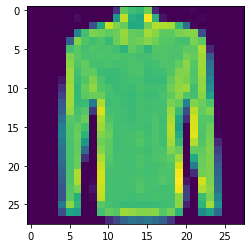

In [23]:
plt.imshow(X_train[40])

### Image normalization

We devide each image in the training and testing dataset with the maxiumum number of pixels (255).

In this way each pixel will be in the rainge [0, 1]. By normalizing images we are making sure that our model (ANN) trains faster.

In [24]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Training data shape: {}".format(X_train.shape))
print("Testing data shape: {}".format(X_test.shape))

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


# Reshaping of the dataset

## We will be using a fully connected ANN So we will reshape the training and testing subsets to a vector format

In [25]:
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

print("Training data shape: {}".format(X_train.shape))
print("Testing data shape: {}".format(X_test.shape))

Training data shape: (60000, 784)
Testing data shape: (10000, 784)


# Building an Artificial Neural network

## Defining the model
### Simply define an object of the Sequential model.

In [26]:
model = tf.keras.models.Sequential()

### Adding the first layer (Dense layer)
Layer hyper-parameters:
- number of units/neurons: 128
- activation function: ReLU
- input_shape: (784, )

In [27]:
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784, )))

### Adding a Dropout layer 

Dropout is a Regularization technique where we randomly set neurons in a layer to zero. In this way, while training those neurons won't be updated. Because some percentage of neurons won't be updated less chance for overfitting.

In [28]:
model.add(tf.keras.layers.Dropout(0.2))

### Adding the second layer (output layer)

- units == number of classes (10 in the case of Fashion MNIST)
- activation = 'softmax'

In [29]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

### Comiling the model

- Optimizer: Adam
- Loss: Sparse softmax (categorical) crossentropy 

In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Training the model

In [32]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5348 - sparse_categorical_accuracy: 0.8106
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4037 - sparse_categorical_accuracy: 0.8543
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3702 - sparse_categorical_accuracy: 0.8644
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3478 - sparse_categorical_accuracy: 0.8728
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3337 - sparse_categorical_accuracy: 0.8767


## Model evaluation and prediction

In [33]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3632 - sparse_categorical_accuracy: 0.8701


In [34]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.8701000213623047
